In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

import seaborn as sns
sns.set(context="poster", style="ticks", font_scale=1.4)

import numpy as np
import pandas as pd

import astropy
from astropy import units as u

import datasets
from matching import Matches

In [2]:
COSMOS = datasets.COSMOS("COSMOS_reference.sqlite")

In [3]:
COSMOS.df.head()

,id,alpha,delta,flag_Capak,flag_UVISTA,flag_deep,flag_shallow,photo_z,classification,mass_med,mass_med_min68,mass_med_max68,ra,dec
216438,216439,149.697606,1.616639,0,0,0,0.0,0.0386,1,7.74447,7.61479,8.19060,149.697606,1.616639
218603,218604,149.749393,1.618068,0,0,0,0.0,0.3797,0,11.07610,11.00020,11.12550,149.749393,1.618068
219019,219020,150.125093,1.616900,0,0,0,0.0,0.1600,1,10.90000,10.86600,10.93410,150.125093,1.616900
219655,219656,150.388349,1.614538,0,0,0,0.0,2.3343,1,8.99275,8.82478,9.12685,150.388349,1.614538
219656,219657,150.383607,1.614532,0,0,0,0.0,1.3916,1,8.51774,7.95630,9.01445,150.383607,1.614532


In [4]:
COSMOS.df.describe()

,id,alpha,delta,flag_Capak,flag_UVISTA,flag_deep,flag_shallow,photo_z,classification,mass_med,mass_med_min68,mass_med_max68,ra,dec
count,518331.000000,518331.000000,518331.000000,518331.0,518331.0,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000
mean,615457.013908,150.072394,2.232306,0.0,0.0,0.356195,0.325722,1.501246,0.947572,8.932841,8.778190,9.063062,150.072394,2.232306
std,219034.343293,0.381040,0.336753,0.0,0.0,0.478874,0.468645,1.056322,0.222889,0.924280,1.247627,1.204603,0.381040,0.336753
min,216439.000000,149.411366,1.614532,0.0,0.0,0.000000,0.000000,0.005000,0.000000,4.064430,-99.000000,-99.000000,149.411366,1.614532
25%,433451.000000,149.750004,1.954606,0.0,0.0,0.000000,0.000000,0.698100,1.000000,8.324890,8.130915,8.494390,149.750004,1.954606
50%,610922.000000,150.073257,2.228252,0.0,0.0,0.000000,0.000000,1.225400,1.000000,8.952890,8.791550,9.091950,150.073257,2.228252
75%,805861.500000,150.388587,2.523300,0.0,0.0,1.000000,1.000000,2.073100,1.000000,9.548460,9.422860,9.655005,150.388587,2.523300
max,995746.000000,150.786592,2.814121,0.0,0.0,1.000000,1.000000,5.994900,1.000000,12.316700,12.254600,13.066000,150.786592,2.814121


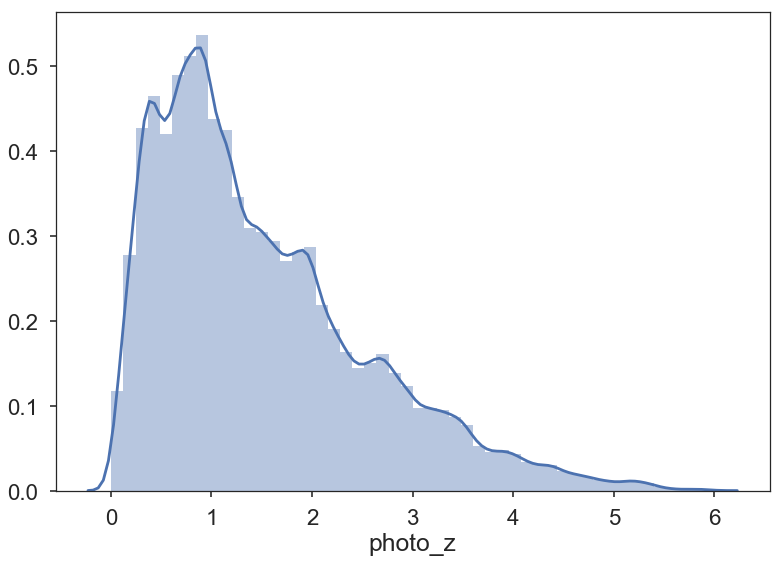

In [5]:
sns.distplot(COSMOS.df.photo_z)

In [6]:
downsample_factor = 10
mask_COSMOS_downsample = (COSMOS.df.index % downsample_factor == 0)

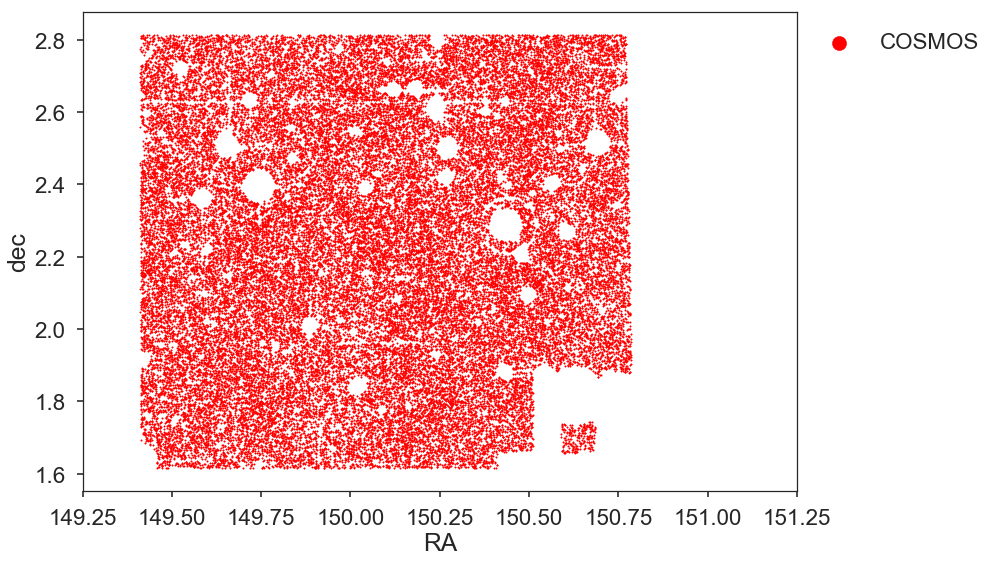

In [7]:
plt.scatter(COSMOS.df.ra[mask_COSMOS_downsample], COSMOS.df.dec[mask_COSMOS_downsample],
           label =COSMOS.label, color="r", s=2)

plt.xlabel("RA")
plt.ylabel("dec")

plt.xlim(149.25, 151.25)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), 
          markerscale=10)


# HSC Data

As far as I can tell, none of the files sent by Josh / Alexie actually have HSC galaxies with ra + dec attached. (Jinsoo used `../catalogs/HSC_6.20.fits`). Maybe it's in Josh's pickled [frankenz data](https://github.com/joshspeagle/frankenz), but the portability issues of pickling mean my computer can't read that file.

Fortunately, HSC (data release 1) is publically available now ([link to database](https://hsc-release.mtk.nao.ac.jp/doc/index.php/database/)).  So I just downloaded the COSMOS Wide stack (median seeing) dataset (`SELECT object_id, ra, dec from pdr1_cosmos_widedepth_median.forced`)

Okay, back to work:

In [8]:
import datasets

In [9]:
HSC = datasets.HSC("HSC_COSMOS_median_forced.sqlite3")

In [10]:
HSC.df.head()

,ra,dec,detect_is_patch_inner,detect_is_tract_inner,detect_is_primary,gcmodel_flux,gcmodel_flux_err,gcmodel_flux_flags,rcmodel_flux,rcmodel_flux_err,rcmodel_flux_flags,icmodel_flux,icmodel_flux_err,icmodel_flux_flags,zcmodel_flux,zcmodel_flux_err,zcmodel_flux_flags,ycmodel_flux,ycmodel_flux_err,ycmodel_flux_flags
object_id,,,,,,,,,,,,,,,,,,,,
43158034708430853,150.903878,1.697209,True,True,True,NaN,NaN,True,NaN,NaN,None,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True
43158034708430859,150.902865,1.700115,True,True,True,1.589821e-30,3.225965e-31,False,NaN,NaN,None,3.753320e-30,3.992952e-31,False,-9.020090e-31,5.404378e-31,False,1.464685e-30,1.823984e-30,False
43158034708430861,150.906167,1.700661,True,True,True,NaN,NaN,True,NaN,NaN,None,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True
43158034708430866,150.909037,1.705647,True,True,True,NaN,NaN,True,NaN,NaN,None,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True
43158034708430870,150.909058,1.707563,True,True,True,NaN,NaN,True,NaN,NaN,None,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True


In [11]:
HSC.df.describe()

,ra,dec,gcmodel_flux,gcmodel_flux_err,rcmodel_flux,rcmodel_flux_err,icmodel_flux,icmodel_flux_err,zcmodel_flux,zcmodel_flux_err,ycmodel_flux,ycmodel_flux_err
count,928534.000000,928534.000000,7.690350e+05,7.551790e+05,8.027340e+05,7.961300e+05,8.275200e+05,8.166680e+05,8.283700e+05,8.167040e+05,8.195020e+05,8.005810e+05
mean,150.203410,2.228374,6.519398e-30,2.609099e-31,1.156106e-29,2.450737e-31,2.041056e-29,4.497654e-31,2.687119e-29,6.071187e-31,3.272011e-29,1.831965e-30
std,0.390018,0.393860,6.638197e-29,1.358594e-31,1.158724e-28,5.136422e-30,1.869028e-28,2.747879e-31,2.539900e-28,4.223019e-31,3.122411e-28,1.111928e-30
min,149.504135,1.487604,-1.387765e-29,1.106159e-31,-1.065718e-26,7.876289e-32,-1.003394e-28,2.055935e-31,-9.183730e-29,3.004014e-31,-1.932652e-28,9.309609e-31
25%,149.878660,1.904190,6.320586e-31,2.033603e-31,1.063674e-30,1.727344e-31,1.346148e-30,3.331775e-31,1.463098e-30,4.413547e-31,1.192934e-30,1.361729e-30
50%,150.200577,2.229233,1.418287e-30,2.402754e-31,1.958424e-30,2.184194e-31,2.832784e-30,4.045115e-31,3.291403e-30,5.408081e-31,4.051469e-30,1.639472e-30
75%,150.516367,2.552068,3.103480e-30,2.849902e-31,4.369804e-30,2.660773e-31,6.630696e-30,4.948445e-31,8.306420e-30,6.549200e-31,1.039705e-29,1.973811e-30
max,150.991734,2.975204,1.686952e-26,1.707486e-29,2.955184e-26,4.581177e-27,4.123954e-26,2.487757e-29,5.644434e-26,6.039158e-29,6.594440e-26,1.004648e-28


In [12]:
downsample_factor = 10
mask_HSC_downsample = (HSC.df.index % downsample_factor == 0)

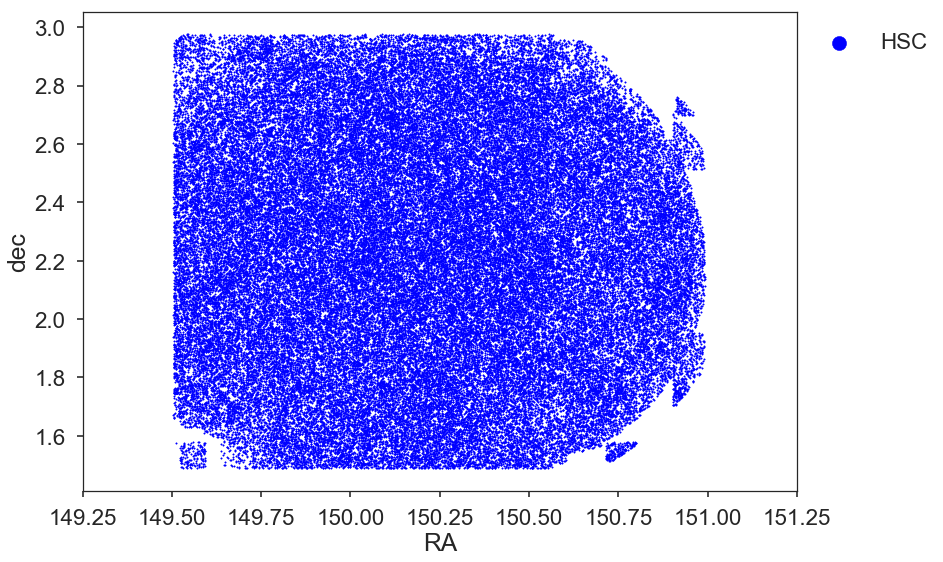

In [13]:
plt.scatter(HSC.df.ra[mask_HSC_downsample], HSC.df.dec[mask_HSC_downsample],
           label =HSC.label, color="b", s=2)

plt.xlabel("RA")
plt.ylabel("dec")

plt.xlim(149.25, 151.25)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), 
          markerscale=10)


# Plot both datasets

In [14]:
downsample_factor_COSMOS = 30
mask_COSMOS_downsample = (COSMOS.df.index % downsample_factor_COSMOS == 0)

downsample_factor_HSC = 30*2
mask_HSC_downsample = (HSC.df.index % downsample_factor_HSC == 0)

print("Number of COSMOS galaxies to plot: ", mask_COSMOS_downsample.sum())
print("Number of HSC galaxies to plot:    ", mask_HSC_downsample.sum())

Number of COSMOS galaxies to plot:  17227
Number of HSC galaxies to plot:     15443


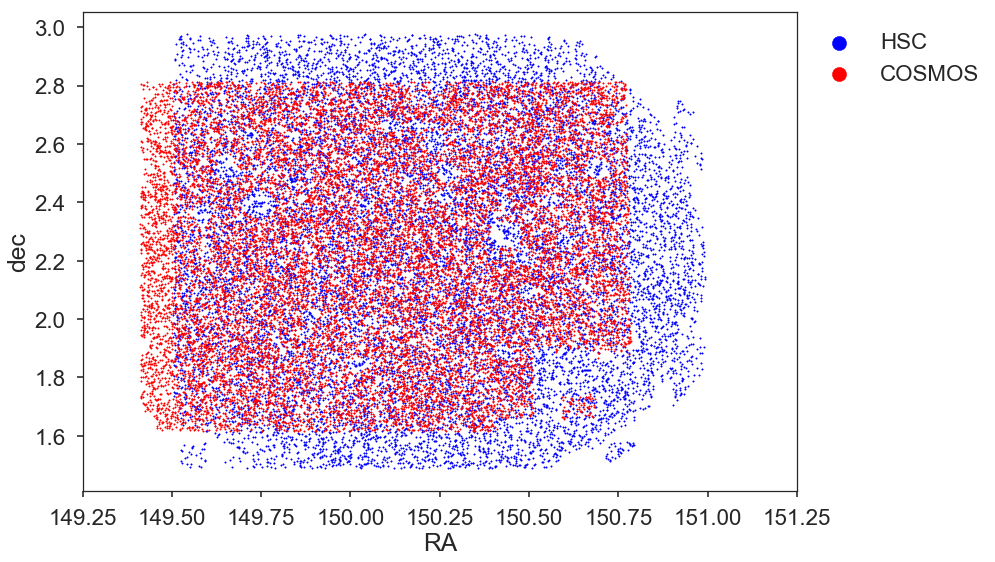

In [15]:
plt.scatter(HSC.df.ra[mask_HSC_downsample], HSC.df.dec[mask_HSC_downsample],
           label =HSC.label, color="b", s=2)


plt.scatter(COSMOS.df.ra[mask_COSMOS_downsample], COSMOS.df.dec[mask_COSMOS_downsample],
           label =COSMOS.label, color="r", s=2)


plt.xlabel("RA")
plt.ylabel("dec")

plt.xlim(149.25, 151.25)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), 
          markerscale=10)


# Start matching

In [16]:
downsample_factor_COSMOS = 1
mask_COSMOS_downsample = (COSMOS.df.index % downsample_factor_COSMOS == 0)

downsample_factor_HSC = 1
mask_HSC_downsample = (HSC.df.index % downsample_factor_HSC == 0)

In [17]:
matches = Matches(COSMOS,
                  HSC,
                  mask_catalog_1=mask_COSMOS_downsample,
                  mask_catalog_2=mask_HSC_downsample,
                 )

# Evaluate matches

In [18]:
print("threshold (error) : {:>5.2f}".format(matches.threshold_error))
print("threshold (match) : {:>5.2f}".format(matches.threshold_match))

threshold (error) : 15.00 arcsec
threshold (match) :  1.00 arcsec


In [19]:
print("overall completeness : {:.2f} %".format(100*np.mean(matches.mask_match[~matches.mask_error])))

overall completeness : 83.92 %


In [20]:
print("min separation: ", min(matches.sep.to(u.arcsec)))
print("max separation: ", max(matches.sep.to(u.arcsec)))

min separation:  0.00022687arcsec
max separation:  335.458arcsec


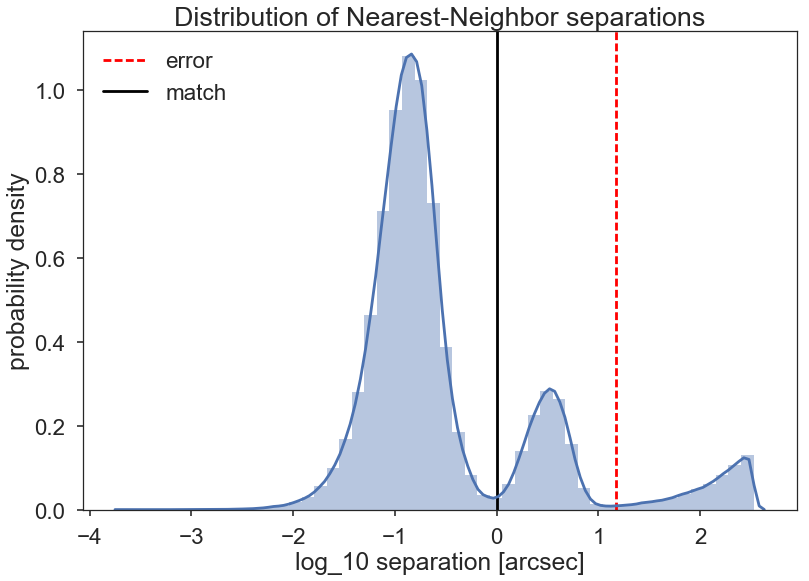

In [21]:
plt.axvline(np.log10(matches.threshold_error.to(u.arcsec).value),   
            linestyle="dashed", color="r", label="error")
plt.axvline(np.log10(matches.threshold_match.to(u.arcsec).value), 
            linestyle="solid",  color="k", label="match")
plt.legend(loc="upper left")

sns.distplot(np.log10(matches.sep.to(u.arcsec).value))
plt.xlabel("log_10 separation [arcsec]")
plt.ylabel("probability density")

plt.title("Distribution of Nearest-Neighbor separations")

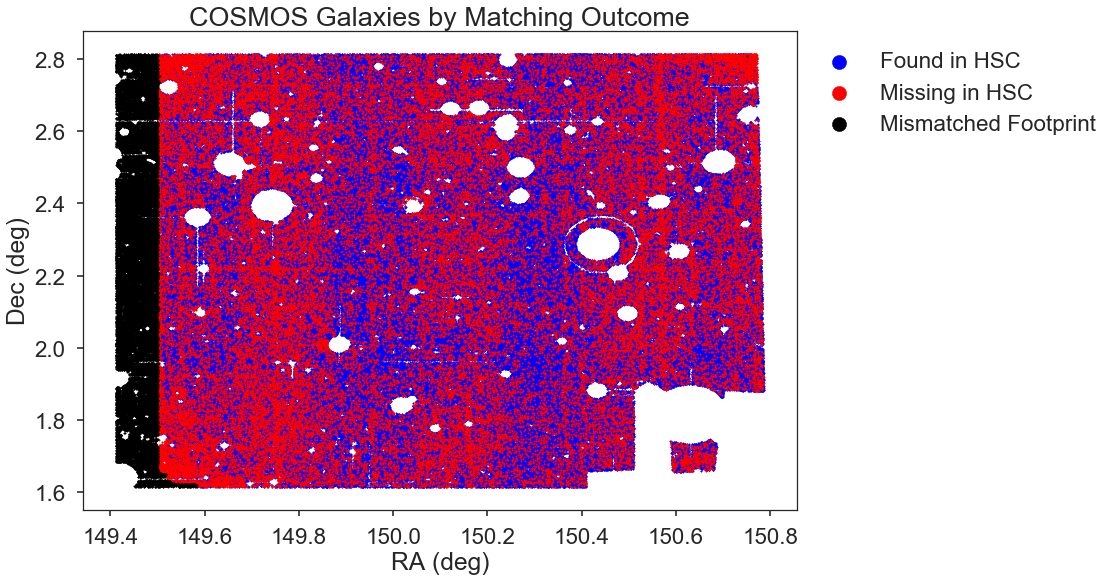

In [22]:
# plt.scatter(COSMOS.df.ra,
#             COSMOS.df.dec,
#             color="b", s=2,
#             label="Found in HSC")

plt.scatter(COSMOS.df[matches.mask_catalog_1][matches.mask_match].ra,
            COSMOS.df[matches.mask_catalog_1][matches.mask_match].dec,
            color="b", s=2,
            label="Found in HSC")



# plt.scatter(HSC.df[matches.mask_catalog_2].iloc[matches.idx[matches.mask_error]].ra,
#             HSC.df[matches.mask_catalog_2].iloc[matches.idx[matches.mask_error]].dec,
#             color="k", s=10,
#             label="Errors")

plt.scatter(COSMOS.df[matches.mask_catalog_1][~matches.mask_error & ~matches.mask_match].ra,
            COSMOS.df[matches.mask_catalog_1][~matches.mask_error & ~matches.mask_match].dec,
            color="r", s=2,
            label="Missing in HSC")


plt.scatter(COSMOS.df[matches.mask_catalog_1][matches.mask_error].ra,
            COSMOS.df[matches.mask_catalog_1][matches.mask_error].dec,
            color="k", s=2,
            label="Mismatched Footprint")



plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")

plt.legend(loc="upper left", bbox_to_anchor=(1,1), markerscale=10)
plt.title("COSMOS Galaxies by Matching Outcome")

# Make the 2d completeness plot (overall)

In [23]:
masses  = matches.catalog_1.df[matches.mask_catalog_1][~matches.mask_error].mass_med
photo_z = matches.catalog_1.df[matches.mask_catalog_1][~matches.mask_error].photo_z

matched = np.array(matches.mask_match[~matches.mask_error], dtype=float)


In [24]:
num_bins = 100
num_galaxies, x_edges, y_edges = np.histogram2d(photo_z, masses, bins=num_bins)
num_matches, _, _ = np.histogram2d(photo_z, masses, bins=[x_edges, y_edges], weights=matched)

num_matches  = num_matches.T
num_galaxies = num_galaxies.T

completeness = num_matches / num_galaxies

/Users/egentry/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


In [25]:
completeness[np.isfinite(completeness)].min()

0.0

In [26]:
completeness[np.isfinite(completeness)].max()

1.0

In [27]:
xx, yy = np.meshgrid(x_edges[:-1], y_edges[:-1])
yy = 10**yy # get back into linear space for masses

#### Plot overall histogram of COSMOS Galaxies:


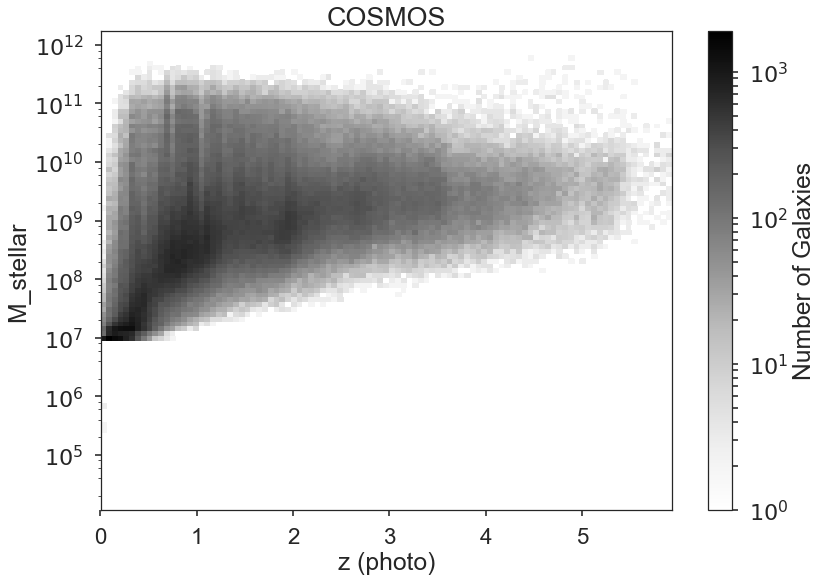

In [28]:
plt.pcolormesh(xx, yy, num_galaxies,
                 norm=colors.LogNorm(vmin=1, vmax=num_galaxies.max()),
#                cmap=plt.cm.viridis_r, 
              )
plt.colorbar(label="Number of Galaxies")
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

plt.yscale("log")
plt.title("COSMOS")

#### Plot completeness of COSMOS galaxies in HSC
Red contours are linearly spaced contours of the COSMOS galaxy distribution

/Users/egentry/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


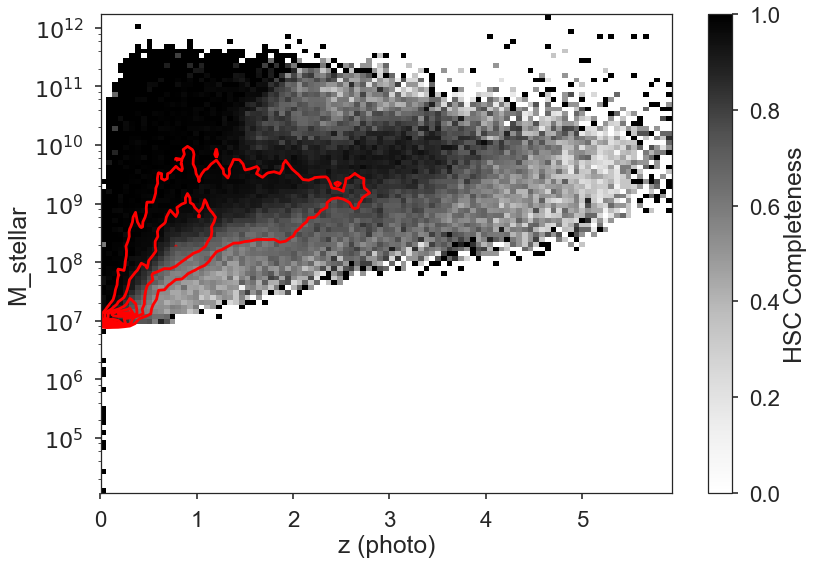

In [29]:
plt.pcolormesh(xx, yy, completeness,
               vmin=0, vmax=1, 
#                cmap=plt.cm.viridis_r, 
              )
plt.colorbar(label="{} Completeness".format(matches.catalog_2.label))
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

plt.contour(xx, yy, num_galaxies, colors="r",
#             norm=colors.LogNorm(vmin=100, vmax=num_galaxies.max()),
            label="{} Density".format(matches.catalog_1.label)
           )

plt.yscale("log")

# Make the 2d completeness plot (low-$z$)
Recreate the same two plots as above, but now only look at the low redshift area

In [30]:
num_bins = 100
histogram_range = ((0, .5), (6.5, 12.5))
num_galaxies, x_edges, y_edges = np.histogram2d(photo_z, masses, 
                                                range=histogram_range, bins=num_bins)
num_matches, _, _ = np.histogram2d(photo_z, masses, bins=[x_edges, y_edges], weights=matched)

num_matches  = num_matches.T
num_galaxies = num_galaxies.T

completeness = num_matches / num_galaxies

/Users/egentry/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


In [31]:
completeness[np.isfinite(completeness)].min()

0.0

In [32]:
completeness[np.isfinite(completeness)].max()

1.0

In [33]:
xx, yy = np.meshgrid(x_edges[:-1], y_edges[:-1])
yy = 10**yy # get back into linear space for masses

#### Plot overall histogram of COSMOS Galaxies:
The red box is the area that we will be trying to isolate in `HSC_COSMOS_cuts.ipynb`

In [34]:
def add_target_box(ax):
    ax.add_patch(
    patches.Rectangle(
        (0, 10**7),   # (x,y)
        0.15,          # width
        10**9,          # height
    fill=False, color="r", linewidth=6),)

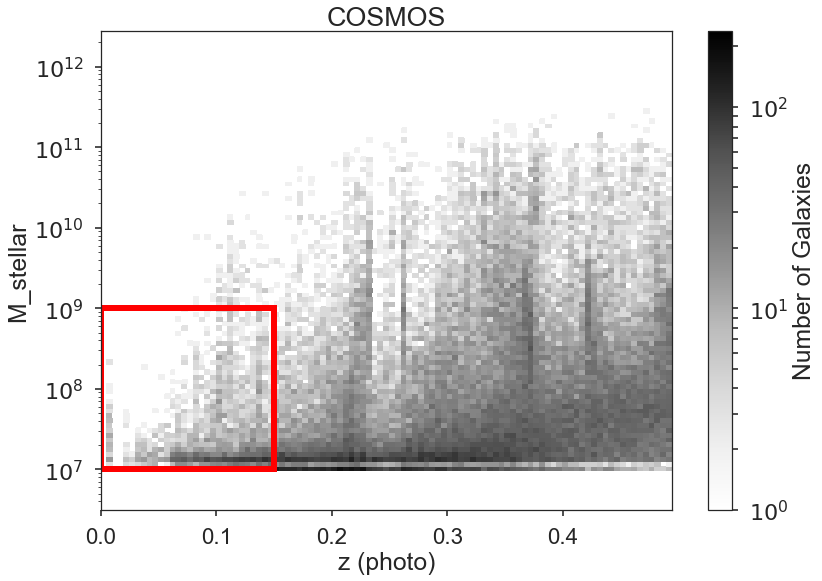

In [35]:
plt.pcolormesh(xx, yy, num_galaxies,
                 norm=colors.LogNorm(vmin=1, vmax=num_galaxies.max()),
#                cmap=plt.cm.viridis_r, 
              )
plt.colorbar(label="Number of Galaxies")
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

add_target_box(plt.gca())

plt.yscale("log")
plt.title("COSMOS")

#### Plot completeness of COSMOS galaxies in HSC
The red box is the area that we will be trying to isolate in `HSC_COSMOS_cuts.ipynb`

/Users/egentry/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


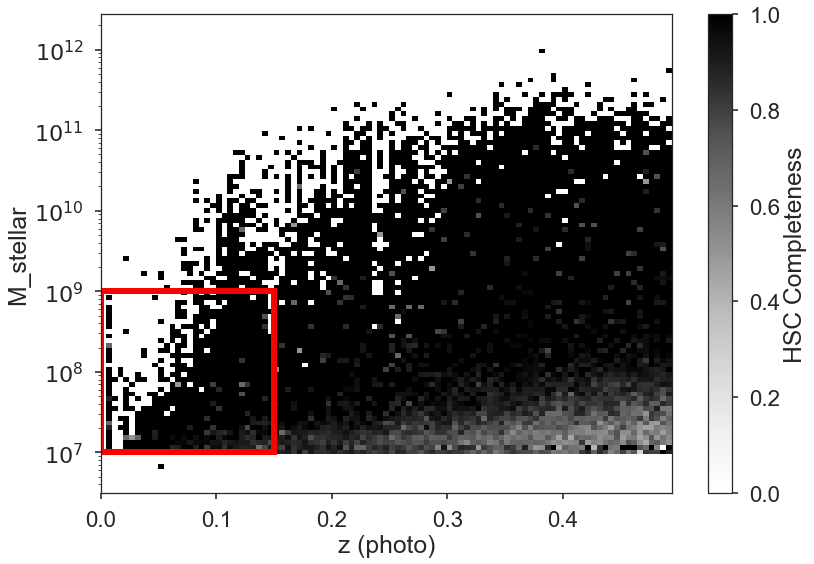

In [36]:
plt.pcolormesh(xx, yy, completeness,
               vmin=0, vmax=1, 
#                cmap=plt.cm.viridis_r, 
              )
plt.colorbar(label="{} Completeness".format(matches.catalog_2.label))
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

# plt.contour(xx, yy, num_galaxies, colors="r",
#             norm=colors.LogNorm(vmin=100, vmax=num_galaxies.max()),
#             label="{} Density".format(matches.catalog_1.label)
#            )

add_target_box(plt.gca())

plt.yscale("log")